In [1]:
import os
import numpy as np
import tqdm
from tqdm.notebook import tqdm_notebook
import pandas as pd
import datetime
import sklearn

In [2]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [5]:
import matplotlib.pyplot as plt

In [6]:
tqdm_notebook.pandas()

# Train

In [5]:
training_folds = [1,2,3,4,6]
features = ['mfcc', 'spectogram', 'mel_spectogram', 'chroma_stft', 'chroma_cqt', 'chroma_cens', 'spectral_contrast', 'tonnetz', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_flatness', 'poly_features', 'zero_crossing_rate', 'spectral_rolloff']

In [6]:
n_features = 0
feature_matrices = []
for feature in tqdm_notebook(features, desc = "Features loop"):
    feature_matrix = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/{feature}_matrix.npy')
    n_observations = feature_matrix.shape[0]
    if len(feature_matrix.shape) > 2:
        n_features = n_features + feature_matrix.shape[1]
    else:
        n_features = n_features + 1
        n_samples = feature_matrix.shape[1]
    feature_matrices.append(feature_matrix)

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [7]:
X_train = np.ndarray(shape = (n_observations, n_features, n_samples))

In [8]:
for feature_matrix in tqdm_notebook(feature_matrices, desc = "Features loop"):
    for i in range(X_train.shape[0]):
        feature_count = 0
        if len(feature_matrix.shape) > 2:
            for j in range(feature_matrix.shape[1]):
                X_train[i, feature_count] = feature_matrix[i, j]
                feature_count = feature_count + 1
        else:
            X_train[i, feature_count] = feature_matrix[i]
            feature_count = feature_count + 1

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [9]:
y_train = np.load('/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/training_class.json.npy')

# Test

In [10]:
test_folds = [5,7,8,9,10]
features = ['mfcc', 'spectogram', 'mel_spectogram', 'chroma_stft', 'chroma_cqt', 'chroma_cens', 'spectral_contrast', 'tonnetz', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_flatness', 'poly_features', 'zero_crossing_rate', 'spectral_rolloff']

In [11]:
n_features = 0
feature_matrices = []
for feature in tqdm_notebook(features, desc = "Features loop"):
    feature_matrix = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/{feature}_matrix.npy')
    n_observations = feature_matrix.shape[0]
    if len(feature_matrix.shape) > 2:
        n_features = n_features + feature_matrix.shape[1]
    else:
        n_features = n_features + 1
        n_samples = feature_matrix.shape[1]
    feature_matrices.append(feature_matrix)

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [12]:
X_test = np.ndarray(shape = (n_observations, n_features, n_samples))

In [13]:
for feature_matrix in tqdm_notebook(feature_matrices, desc = "Features loop"):
    for i in range(X_test.shape[0]):
        feature_count = 0
        if len(feature_matrix.shape) > 2:
            for j in range(feature_matrix.shape[1]):
                X_test[i, feature_count] = feature_matrix[i, j]
                feature_count = feature_count + 1
        else:
            X_test[i, feature_count] = feature_matrix[i]
            feature_count = feature_count + 1

Features loop:   0%|          | 0/15 [00:00<?, ?it/s]

In [14]:
y_test = np.load('/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/test_class.json.npy')

In [15]:
for i in tqdm_notebook(range(5)):
    if i != 4:
        start = i * 1000
        stop = (i+1)*1000
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/X_train_complete{i}.npy',X_train[start:stop,:,:])
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/y_train{i}.npy',y_train[start:stop])
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/X_test_complete{i}.npy',X_test[start:stop,:,:])
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/y_test{i}.npy',y_test[start:stop])
    else:
        start = i * 1000
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/X_train_complete{i}.npy',X_train[start:,:,:])
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/y_train{i}.npy',y_train[start:])
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/X_test_complete{i}.npy',X_test[start:,:,:])
        np.save(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/y_test{i}.npy',y_test[start:])
    

  0%|          | 0/5 [00:00<?, ?it/s]

In [15]:
np.save('/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/X_train_complete.npy',X_train)

In [16]:
np.save('/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/X_test_complete.npy',X_test)

In [17]:
np.save('/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/y_train.npy',y_train)

In [18]:
np.save('/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/y_test.npy',y_test)

# Neural Network

In [8]:
X_test.shape

(233, 1250, 173)

In [5]:
histories = []
for j in tqdm_notebook(range(4)):
    #model    
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, strides = 1, padding='same', activation='relu', input_shape=(1250, 173,)))
    model.add(MaxPooling1D(pool_size=8, padding='same'))
    model.add(Conv1D(filters=128, kernel_size=5, strides = 1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=8, padding='same'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    #print(model.summary())

    for i in ([x for x in range(4) if x != j]):
        X_train = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/X_train_complete{i}.npy')
        y_train = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/y_train{i}.npy')
        X_val = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/X_train_complete{j}.npy')
        y_val = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/y_train{j}.npy')
        history = model.fit(X_train,
                            y_train,
                            epochs= 30,
                            batch_size = 50,
                            validation_data = (X_val, y_val),
                            callbacks = [])
    histories.append((i, history, model))

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-08-31 10:37:04.513565: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-31 10:37:04.513791: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - ETA: 0s - loss: 2.0984 - accuracy: 0.2438WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x3a0ae9550> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
20/20 [==============================] - 2s 106ms/step - loss: 2.0846 - accuracy: 0.2496 - val_loss: 2.2598 - val_accuracy: 0.2090
Epoch 2

Epoch 22/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.4875 - val_accuracy: 0.3290
Epoch 23/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.5470 - val_accuracy: 0.3300
Epoch 24/30
20/20 [==============================] - 2s 84ms/step - loss: 9.1821e-04 - accuracy: 1.0000 - val_loss: 5.5915 - val_accuracy: 0.3330
Epoch 25/30
20/20 [==============================] - 2s 83ms/step - loss: 7.8103e-04 - accuracy: 1.0000 - val_loss: 5.6808 - val_accuracy: 0.3330
Epoch 26/30
20/20 [==============================] - 2s 83ms/step - loss: 7.1489e-04 - accuracy: 1.0000 - val_loss: 5.7592 - val_accuracy: 0.3310
Epoch 27/30
20/20 [==============================] - 2s 84ms/step - loss: 6.1786e-04 - accuracy: 1.0000 - val_loss: 5.7794 - val_accuracy: 0.3340
Epoch 28/30
20/20 [==============================] - 2s 83ms/step - loss: 5.6312e-04 - accuracy: 1.0000 - val_loss: 5.8385 - val_acc

20/20 [==============================] - 2s 83ms/step - loss: 0.4025 - accuracy: 0.8512 - val_loss: 3.6712 - val_accuracy: 0.3600
Epoch 7/30
20/20 [==============================] - 2s 84ms/step - loss: 0.3160 - accuracy: 0.8886 - val_loss: 3.5442 - val_accuracy: 0.3630
Epoch 8/30
20/20 [==============================] - 2s 83ms/step - loss: 0.2818 - accuracy: 0.9132 - val_loss: 4.0106 - val_accuracy: 0.3620
Epoch 9/30
20/20 [==============================] - 2s 88ms/step - loss: 0.1528 - accuracy: 0.9452 - val_loss: 4.1804 - val_accuracy: 0.4160
Epoch 10/30
20/20 [==============================] - 2s 85ms/step - loss: 0.0968 - accuracy: 0.9741 - val_loss: 4.8216 - val_accuracy: 0.4050
Epoch 11/30
20/20 [==============================] - 2s 84ms/step - loss: 0.0742 - accuracy: 0.9778 - val_loss: 4.8830 - val_accuracy: 0.4030
Epoch 12/30
20/20 [==============================] - 2s 85ms/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 4.8006 - val_accuracy: 0.3990
Epoch 13/30
20/20 [==

Epoch 4/30
20/20 [==============================] - 2s 83ms/step - loss: 0.5568 - accuracy: 0.7950 - val_loss: 2.9145 - val_accuracy: 0.3700
Epoch 5/30
20/20 [==============================] - 2s 83ms/step - loss: 0.4220 - accuracy: 0.8510 - val_loss: 3.0645 - val_accuracy: 0.3940
Epoch 6/30
20/20 [==============================] - 2s 83ms/step - loss: 0.2812 - accuracy: 0.8920 - val_loss: 3.6872 - val_accuracy: 0.3500
Epoch 7/30
20/20 [==============================] - 2s 84ms/step - loss: 0.2257 - accuracy: 0.9200 - val_loss: 3.7252 - val_accuracy: 0.3960
Epoch 8/30
20/20 [==============================] - 2s 83ms/step - loss: 0.1855 - accuracy: 0.9330 - val_loss: 4.1852 - val_accuracy: 0.3460
Epoch 9/30
20/20 [==============================] - 2s 83ms/step - loss: 0.1435 - accuracy: 0.9480 - val_loss: 4.4739 - val_accuracy: 0.3610
Epoch 10/30
20/20 [==============================] - 2s 83ms/step - loss: 0.1430 - accuracy: 0.9510 - val_loss: 4.3615 - val_accuracy: 0.3500
Epoch 11/30


Epoch 16/30
20/20 [==============================] - 2s 86ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 6.2052 - val_accuracy: 0.3590
Epoch 17/30
20/20 [==============================] - 2s 85ms/step - loss: 0.0080 - accuracy: 0.9990 - val_loss: 6.2567 - val_accuracy: 0.3710
Epoch 18/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 6.4277 - val_accuracy: 0.3650
Epoch 19/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 6.5694 - val_accuracy: 0.3600
Epoch 20/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 6.6890 - val_accuracy: 0.3640
Epoch 21/30
20/20 [==============================] - 2s 83ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 6.6986 - val_accuracy: 0.3700
Epoch 22/30
20/20 [==============================] - 2s 84ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 6.6960 - val_accuracy: 0.3680
Epoch 

20/20 [==============================] - 2s 84ms/step - loss: 4.4676e-04 - accuracy: 1.0000 - val_loss: 6.8676 - val_accuracy: 0.4210
Epoch 28/30
20/20 [==============================] - 2s 83ms/step - loss: 4.1924e-04 - accuracy: 1.0000 - val_loss: 6.9011 - val_accuracy: 0.4210
Epoch 29/30
20/20 [==============================] - 2s 83ms/step - loss: 3.9417e-04 - accuracy: 1.0000 - val_loss: 6.9331 - val_accuracy: 0.4200
Epoch 30/30
20/20 [==============================] - 2s 82ms/step - loss: 3.7194e-04 - accuracy: 1.0000 - val_loss: 6.9673 - val_accuracy: 0.4180


In [6]:
summary_history = dict({'loss':[], 'accuracy':[], 'val_loss':[], 'val_accuracy':[]})
for h in histories:
    summary_history['loss'].append(h[1].history['loss'][-1])
    summary_history['accuracy'].append(h[1].history['accuracy'][-1])
    summary_history['val_loss'].append(h[1].history['val_loss'][-1]) 
    summary_history['val_accuracy'].append(h[1].history['val_accuracy'][-1])
summary_history = pd.DataFrame(summary_history)
summary_history

,loss,accuracy,val_loss,val_accuracy
0,0.000829,1.000,4.949602,0.423
1,0.001408,1.000,6.426485,0.370
2,0.016662,0.995,7.090523,0.360
3,0.000372,1.000,6.967278,0.418


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

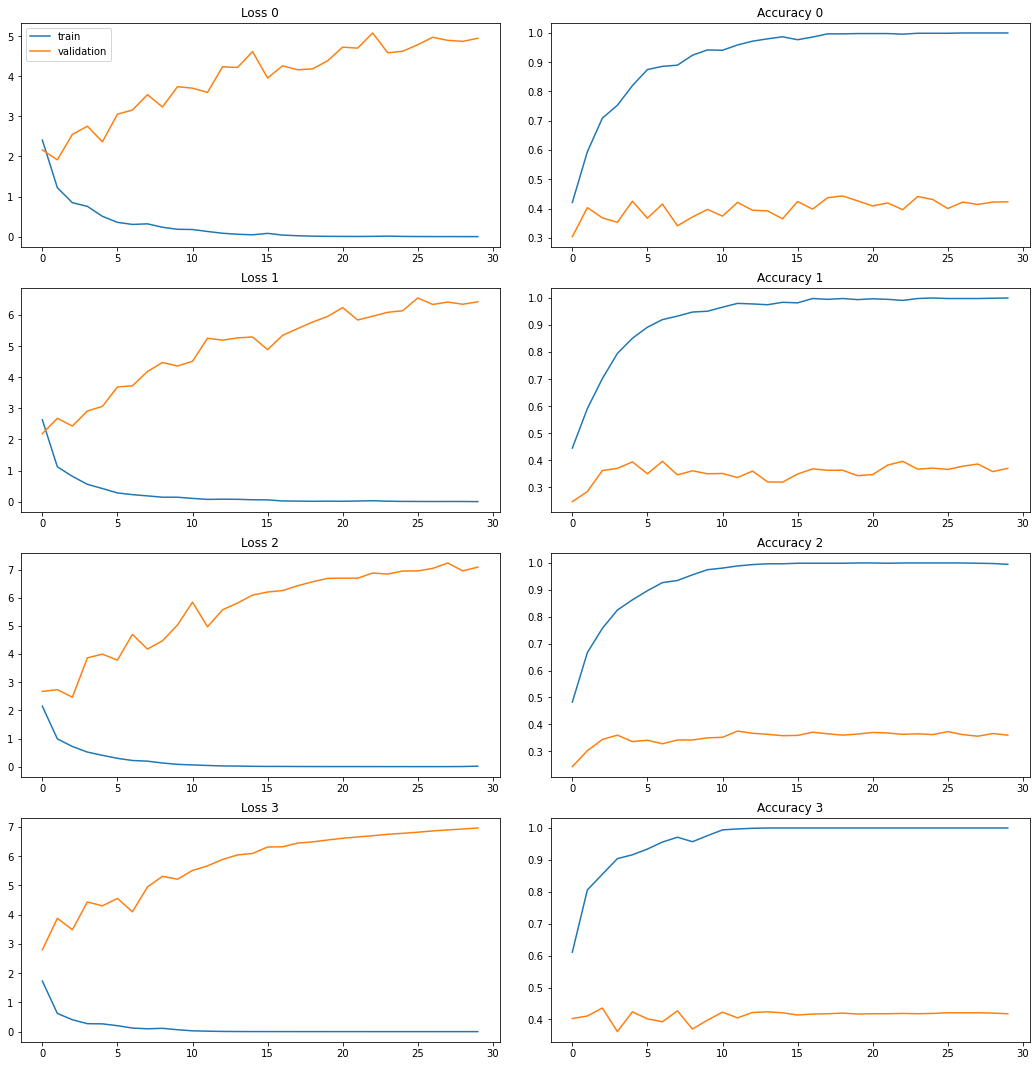

In [11]:
fig, axs = plt.subplots(4, 2,figsize=(15,15))
fig.tight_layout(pad=2.0)
for h, i in zip(histories, range(len(histories))):
    axs[i, 0].plot(h[1].history['loss'])
    axs[i, 0].plot(h[1].history['val_loss'])
    axs[i, 0].set_title(f'Loss {i}')
    axs[i, 0].annotate(str(round(h[1].history['loss'][-1], 2)),
                       xy = (199, h[1].history['loss'][-1]),
                       xytext = (199, h[1].history['loss'][-1] + 0.1))
    axs[i, 0].annotate(str(round(h[1].history['val_loss'][-1], 2)),
                       xy = (199, h[1].history['val_loss'][-1]),
                       xytext = (199, h[1].history['val_loss'][-1] - 0.1))
    axs[0, 0].legend(['train', 'validation'], loc='upper left')
    axs[i, 1].plot(h[1].history['accuracy'])
    axs[i, 1].plot(h[1].history['val_accuracy'])
    axs[i, 1].set_title(f'Accuracy {i}')
    axs[i, 1].annotate(str(round(h[1].history['accuracy'][-1], 2)),
                       xy = (199, h[1].history['accuracy'][-1]),
                       xytext = (199, h[1].history['accuracy'][-1] - 0.01))
    axs[i, 1].annotate(str(round(h[1].history['val_accuracy'][-1], 2)),
                       xy = (199, h[1].history['val_accuracy'][-1]),
                       xytext = (199, h[1].history['val_accuracy'][-1] + 0.01))

In [12]:
fig.savefig('cnn_data_val.pdf')
summary_history.to_csv('summary_history_cnn_data_val.csv')

In [13]:
#best model: highest validation accuracy
best_model_index = summary_history['val_accuracy'].idxmax()
best_model = histories[best_model_index][2]
best_model.save('cnn_data_val')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: cnn_data_val/assets


# Train without validation

In [4]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, strides = 1, padding='same', activation='relu', input_shape=(1250, 173,)))
model.add(MaxPooling1D(pool_size=8, padding='same'))
model.add(Conv1D(filters=128, kernel_size=5, strides = 1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=8, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
#print(model.summary())

X_train = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/X_train_complete.npy')[:4450]
y_train = np.load(f'/Users/lizzy/Desktop/Universita/cesab/project/all_data/train_data/y_train.npy')[:4450]
history = model.fit(X_train,
                    y_train,
                    epochs= 30,
                    batch_size = 50,
                    callbacks = [])

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-08-31 10:50:54.873499: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-31 10:50:54.873740: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


89/89 [==============================] - 6s 64ms/step - loss: 1.8634 - accuracy: 0.3153
Epoch 2/30
89/89 [==============================] - 6s 63ms/step - loss: 1.1875 - accuracy: 0.5948
Epoch 3/30
89/89 [==============================] - 6s 63ms/step - loss: 0.8570 - accuracy: 0.7078
Epoch 4/30
89/89 [==============================] - 6s 63ms/step - loss: 0.6450 - accuracy: 0.7783
Epoch 5/30
89/89 [==============================] - 6s 63ms/step - loss: 0.4910 - accuracy: 0.8370
Epoch 6/30
89/89 [==============================] - 6s 63ms/step - loss: 0.4027 - accuracy: 0.8541
Epoch 7/30
89/89 [==============================] - 6s 63ms/step - loss: 0.3210 - accuracy: 0.8857
Epoch 8/30
89/89 [==============================] - 6s 63ms/step - loss: 0.2719 - accuracy: 0.9056
Epoch 9/30
89/89 [==============================] - 6s 63ms/step - loss: 0.2209 - accuracy: 0.9274
Epoch 10/30
89/89 [==============================] - 6s 63ms/step - loss: 0.1753 - accuracy: 0.9411
Epoch 11/30
89/89 [=

In [5]:
summary_history = dict({'loss':[], 'accuracy':[]})
summary_history['loss'].append(history.history['loss'][-1])
summary_history['accuracy'].append(history.history['accuracy'][-1])
summary_history = pd.DataFrame(summary_history)
summary_history

,loss,accuracy
0,0.009535,0.996854


Text(199, 0.9868539476394653, '1.0')

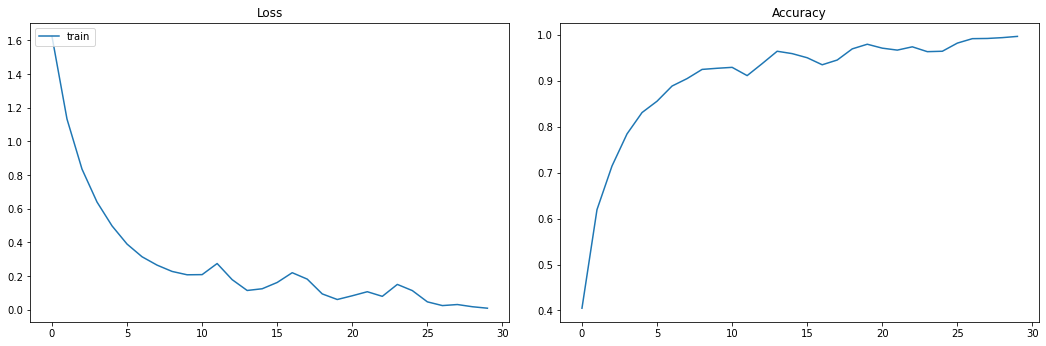

In [9]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))
fig.tight_layout(pad=2.0)
axs[0].plot(history.history['loss'])
axs[0].set_title(f'Loss')
axs[0].annotate(str(round(history.history['loss'][-1], 2)),
                   xy = (199, history.history['loss'][-1]),
                   xytext = (199, history.history['loss'][-1] + 0.1))
axs[0].legend(['train'], loc='upper left')
axs[1].plot(history.history['accuracy'])
axs[1].set_title(f'Accuracy')
axs[1].annotate(str(round(history.history['accuracy'][-1], 2)),
                   xy = (199, history.history['accuracy'][-1]),
                   xytext = (199, history.history['accuracy'][-1] - 0.01))

In [10]:
fig.savefig('cnn_data.pdf')
summary_history.to_csv('summary_history_cnn_data.csv')

In [11]:
model.save('cnn_data')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2021-08-31 10:54:32.725146: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/lizzy/miniforge3/envs/tf_m1/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: cnn_data/assets


# Test

In [7]:
X_test = np.load('/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/X_test_complete.npy')[:4500]
y_test = np.load('/Users/lizzy/Desktop/Universita/cesab/project/all_data/test_data/y_test.npy')[:4500]

In [4]:
model =  tensorflow.keras.models.load_model("cnn_data")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1250, 64)          55424     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 157, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 157, 128)          41088     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               655616    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1

In [9]:
evaluation = model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  1/133 [..............................] - ETA: 25s - loss: 21.3244 - accuracy: 0.5312

2021-08-31 10:55:15.197243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-31 10:55:15.198037: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


133/133 [==============================] - 2s 16ms/step - loss: 9.4284 - accuracy: 0.5363


In [10]:
print(f'Loss: {evaluation[0]}, accuracy:{evaluation[1]}')

Loss: 9.428443908691406, accuracy:0.5362626910209656


In [11]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [12]:
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred.argmax(axis=1))

In [13]:
labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

In [14]:
scores = dict({'Class':[], 'Precision':[], 'Recall':[]})
for cl in range(10):
    precision = matrix[cl,cl] / sum(matrix[:,cl]) #tp/(tp+fp)
    recall = matrix[cl,cl] / sum(matrix[cl,:]) #tp/(tp+fn)
    scores['Class'].append(labels[cl])
    scores['Precision'].append(precision)
    scores['Recall'].append(recall)
scores = pd.DataFrame(scores)
scores

,Class,Precision,Recall
0,air_conditioner,0.675768,0.396000
1,car_horn,0.759777,0.615385
2,children_playing,0.544574,0.562000
3,dog_bark,0.542962,0.594000
4,drilling,0.372325,0.522000
5,engine_idling,0.583333,0.478261
6,gun_shot,0.740196,0.820652
7,jackhammer,0.532134,0.457965
8,siren,0.517900,0.552163
9,street_music,0.494058,0.582000


In [15]:
scores.to_csv('scores_cnn_data.csv')